## Test competitor analysis agent

In [1]:
# Basic settings:
store_basic_info = {
    "address": "上海市静安区南阳路75号",
    "store type": "coffee shop",
    "target customers": "students | office workers | residents | tourists",
    "description": "A coffee shop running from 11 AM to 2 AM, designed as a late-night social and study space. It offers specialty coffee, light desserts, and a cozy atmosphere with both indoor and street-facing seating. The shop aims to attract nearby university students and young professionals seeking a relaxing environment for casual meetings, night study sessions, or social gatherings. Music and lighting will adapt throughout the day—from calm, focused ambiance during the afternoon to a vibrant lounge vibe at night."
}

In [2]:
# set up
import sys
sys.path.append("../")
import os
os.environ["AMAP_API_KEY"] = "68913ce8db83f7bbe5b4cca9720c7a8f"
from map_apis.amap import AMap

amap = AMap()

Location set up

In [3]:
loc_info = amap.getPlaceInfo(store_basic_info['address'])

In [4]:
loc_info

{'provider': 'amap',
 'place_id': '310106',
 'name': '上海市静安区南阳路75号',
 'category': 'unknown',
 'subcategory': None,
 'lat': 31.228644,
 'lng': 121.452431,
 'raw': {'formatted_address': '上海市静安区南阳路75号',
  'country': '中国',
  'province': '上海市',
  'citycode': '021',
  'city': '上海市',
  'district': '静安区',
  'township': [],
  'neighborhood': {'name': [], 'type': []},
  'building': {'name': [], 'type': []},
  'adcode': '310106',
  'street': '南阳路',
  'number': [],
  'location': '121.452431,31.228644',
  'level': '门牌号'}}

### Location Analysis (Naive)
1. Get the location map
2. Prompt ChatGPT to analyze surroundings and potential information

In [8]:
import requests
visualization = amap.getMapVisuailization(loc_info)
r = requests.get(visualization['url'])
png_bytes = r.content
from PIL import Image
import io
im = Image.open(io.BytesIO(png_bytes))

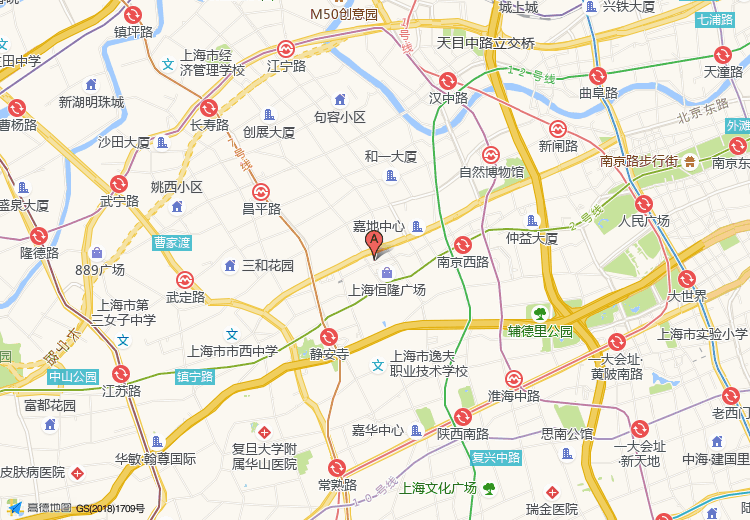

In [9]:
im

#### ChatGPT generated location analysis:
From the map, we can see this place is located in a central location:

**1. Location Overview**

* The site sits in **Jing’an District**, one of Shanghai’s most vibrant commercial and residential zones.
* It is between **南京西路 (Nanjing West Road)** and **静安寺 (Jing’an Temple)**—two major commercial arteries with dense office clusters and upscale shopping centers.
* Within 1 km radius:

  * **Landmarks:** 恒隆广场 (Plaza 66), 嘉地中心, 南京西路商业圈
  * **Metro:** 静安寺站 (Line 2 & 7), 南京西路站 (Line 2 & 12 & 13)
  * **Parks & recreation:** 静安公园, 辅德里公园
  * **Schools:** 上海市市西中学、上海财经大学继续教育学院

---

**2. Major Surroundings & Functional Mix**

| Category              | Examples Nearby           | Notes                                                         |
| --------------------- | ------------------------- | ------------------------------------------------------------- |
| **Office & Business** | 恒隆广场、嘉地中心、创展大厦、仲益大厦       | Dense weekday flow; ideal for white-collar & after-work crowd |
| **Residential**       | 曹家渡、昌平路小区、句容小区、和一大厦公寓     | Stable residential base for afternoon & weekend traffic       |
| **Education**         | 上海市市西中学、三和花园（补习中心）        | Students and parents—suitable for quiet daytime coffee/study  |
| **Tourism & Retail**  | 静安寺景区、南京西路商业街、自然博物馆       | Steady flow of tourists and shoppers                          |
| **Transportation**    | Multiple metro & bus hubs | Easy access; high pedestrian visibility                       |

---

**3. Potential Target Customer Segments**

| Segment                 | Description                                 | Peak Hours                   | Demand Pattern                                        |
| ----------------------- | ------------------------------------------- | ---------------------------- | ----------------------------------------------------- |
| **Office Workers**      | Employees from 恒隆广场、嘉地中心                    | 8–10 AM, 12–2 PM, after 6 PM | Morning coffee, lunch breaks, evening socializing     |
| **Students**            | Nearby middle school / university attendees | After 3 PM–8 PM              | Study, hangout, low-price drinks/snacks               |
| **Residents**           | Local community around 曹家渡、句容小区             | 10 AM–10 PM                  | Leisure coffee, dessert, takeaway                     |
| **Tourists / Shoppers** | Visitors from 静安寺–南京西路 area                 | 11 AM–7 PM                   | Specialty beverages, aesthetics & souvenirs           |
| **Late-Night Crowd**    | Night-shift workers, young people           | 10 PM–2 AM                   | Late-night café niche; few competitors open that late |

---

**4. Business Insights**

* **Traffic synergy:** Proximity to both **business and residential clusters** ensures all-day flow.
* **Differentiation:** Operating **until 2 AM** fills a gap—most cafés nearby close by 10 PM.
* **Positioning suggestion:**

  * “**Daytime workspace + Night-time chill lounge**” concept.
  * Offer **coffee-based cocktails**, **acoustic music**, or **student discounts** after 9 PM.
* **Risks:** High rental pressure on 南京西路 corridor; competition from chains (Seesaw, Manner, Starbucks Reserve).

### Get nearby places
We will get resident buildings, office buildings, schools, and other major information with the nearby API

- Get place codes based on 高德POI分类 file (TODO: intelligent mapping from request to POI code)
    - residence buildings: 120300
    - office buildings: 120201, 120203
    - schools: 141201, 141205, 141206
    - coffee shops: 050500
    - shopping malls: 060100
    - metro stations: 150500
    - bus stations: 150700
    - train stations: 150200

In [5]:
types = ["120300", "120201", "120203", "141201", "141205", "141206", 
         "050500", "060100", "150500", "150700", "150200"]

types = ["120300"]

In [6]:
loc_info

{'provider': 'amap',
 'place_id': '310106',
 'name': '上海市静安区南阳路75号',
 'category': 'unknown',
 'subcategory': None,
 'lat': 31.228644,
 'lng': 121.452431,
 'raw': {'formatted_address': '上海市静安区南阳路75号',
  'country': '中国',
  'province': '上海市',
  'citycode': '021',
  'city': '上海市',
  'district': '静安区',
  'township': [],
  'neighborhood': {'name': [], 'type': []},
  'building': {'name': [], 'type': []},
  'adcode': '310106',
  'street': '南阳路',
  'number': [],
  'location': '121.452431,31.228644',
  'level': '门牌号'}}

In [7]:
nearby_places = amap.getNearbyPlaces(loc_info, types, radius=1000, num_pages=10, include_details=True)

In [8]:
len(nearby_places)

200

In [10]:
nearby_places[0]

{'provider': 'amap',
 'place_id': 'B0GRAR5A5J',
 'name': '西康路112号',
 'category': '120302',
 'subcategory': None,
 'lat': 31.228583,
 'lng': 121.451969,
 'rating': None,
 'review_count': None,
 'address': '西康路与南阳路交叉口东北40米',
 'raw': {'parent': '',
  'address': '西康路与南阳路交叉口东北40米',
  'business': {'keytag': '住宅区', 'rectag': '住宅区'},
  'distance': '44',
  'pcode': '310000',
  'adcode': '310106',
  'pname': '上海市',
  'cityname': '上海市',
  'type': '商务住宅;住宅区;住宅小区',
  'typecode': '120302',
  'adname': '静安区',
  'citycode': '021',
  'name': '西康路112号',
  'location': '121.451969,31.228583',
  'id': 'B0GRAR5A5J'}}

In [22]:
import datasets
dataset = datasets.load_dataset("glue", "sst2")

Generating test split: 100%|██████████| 1821/1821 [00:00<00:00, 681462.13 examples/s]


In [13]:
print("category, name, raw distance")
[(poi['category'], poi['name'], poi['raw']['distance']) for poi in nearby_places]

category, name, raw distance


[('120302', '西康路112号', '44'),
 ('120302', '马克思公寓', '46'),
 ('120302', '南沙公寓', '58'),
 ('120302', '北京西路1177弄小区', '62'),
 ('120300', '北京西路1231弄', '73'),
 ('120300', '申慧城射箭馆(静安区体育馆店)', '80'),
 ('120302', '南阳路30弄', '81'),
 ('120302', '吉羊邨', '88'),
 ('120302', '爱文新邨', '101'),
 ('120302', '北京新邨', '140'),
 ('120302', '西康路167弄小区', '155'),
 ('120300', '北京西路洋房', '174'),
 ('120302', '文德坊', '175'),
 ('120301', '西摩别墅', '175'),
 ('120302', '董家住宅', '176'),
 ('120302', '南阳路新里', '176'),
 ('120302', '北京西路1110弄小区', '186'),
 ('120302', '南阳小区', '196'),
 ('120302', '爱文坊北京西路1300弄', '197'),
 ('120302', '爱文坊', '206'),
 ('120302', '南阳大楼', '207'),
 ('120300', '南京大楼', '210'),
 ('120302', '南阳四季苑', '214'),
 ('120302', '南阳路186弄小区', '218'),
 ('120302', '犹太住宅', '224'),
 ('120302', '爱文坊北京西路1312弄', '226'),
 ('120302', '骏豪国际公寓(金鹰国际购物中心上海店)', '228'),
 ('120300', '南京西路1231弄新里', '249'),
 ('120302', '太平花园', '251'),
 ('120302', '西康公寓', '251'),
 ('120302', '陕北小区(北京西路)', '258'),
 ('120302', '京西大楼', '265'),
 ('120302', '联华小区铜仁路3

Problem: 
1. how to deduplicate
2. how to measure how many people will be living / working there

需要注意的是：搜索API在指定多个类别返回的结果会小于指定单一类别时候的结果

因为存在子POI聚合到父POI下面，所以存在这种情况。 

例如：

指定type=150501，返回15个结果

http://restapi.amap.com/v3/place/polygon?key=<用户的key>&output=json&children=1&offset=50&polygon=116.16999999999996,40.29999999999999;116.26999999999995,40.19999999999999&types=150501&page=1

指定type=150500|150501，返回4个结果

http://restapi.amap.com/v3/place/polygon?key=<用户的key>&output=json&children=1&offset=50&polygon=116.16999999999996,40.29999999999999;116.26999999999995,40.19999999999999&types=150500|150501&page=1

第一个请求没有召回地铁主点，都是出入口。第二个召回了地铁站和出入口，出入口被聚合到地铁站的poi上。

### Get distance
The distance returned with getNearbyPlaces is straight distance, while getDistance measures the accurate distance and duration of walking / driving / taking public transportation

In [33]:
kerry = amap.getPlaceInfo("静安嘉里商场")

In [40]:
henglong = amap.getPlaceInfo("上海恒隆广场")

In [42]:
subway = amap.getPlaceInfo("南京西路地铁站")

In [43]:
subway

{'provider': 'amap',
 'place_id': '310106',
 'name': '上海市静安区南京西路(地铁站)',
 'category': 'unknown',
 'subcategory': None,
 'lat': 31.229853,
 'lng': 121.459971,
 'raw': {'formatted_address': '上海市静安区南京西路(地铁站)',
  'country': '中国',
  'province': '上海市',
  'citycode': '021',
  'city': '上海市',
  'district': '静安区',
  'township': [],
  'neighborhood': {'name': [], 'type': []},
  'building': {'name': [], 'type': []},
  'adcode': '310106',
  'street': [],
  'number': [],
  'location': '121.459971,31.229853',
  'level': '公交地铁站点'}}

In [41]:
henglong

{'provider': 'amap',
 'place_id': '310106',
 'name': '上海市静安区上海恒隆广场',
 'category': 'unknown',
 'subcategory': None,
 'lat': 31.227833,
 'lng': 121.453488,
 'raw': {'formatted_address': '上海市静安区上海恒隆广场',
  'country': '中国',
  'province': '上海市',
  'citycode': '021',
  'city': '上海市',
  'district': '静安区',
  'township': [],
  'neighborhood': {'name': [], 'type': []},
  'building': {'name': [], 'type': []},
  'adcode': '310106',
  'street': [],
  'number': [],
  'location': '121.453488,31.227833',
  'level': '兴趣点'}}

In [34]:
kerry

{'provider': 'amap',
 'place_id': '310106',
 'name': '上海市静安区静安嘉里',
 'category': 'unknown',
 'subcategory': None,
 'lat': 31.224015,
 'lng': 121.449322,
 'raw': {'formatted_address': '上海市静安区静安嘉里',
  'country': '中国',
  'province': '上海市',
  'citycode': '021',
  'city': '上海市',
  'district': '静安区',
  'township': [],
  'neighborhood': {'name': [], 'type': []},
  'building': {'name': [], 'type': []},
  'adcode': '310106',
  'street': [],
  'number': [],
  'location': '121.449322,31.224015',
  'level': '住宅区'}}

In [19]:
nearby_places[150]

{'provider': 'amap',
 'place_id': 'B0FFGFILJ0',
 'name': '陕西北路30弄新里',
 'category': '120302',
 'subcategory': None,
 'lat': 31.224311,
 'lng': 121.4572,
 'rating': None,
 'review_count': None,
 'address': '陕西北路30弄4-18号',
 'raw': {'parent': '',
  'address': '陕西北路30弄4-18号',
  'business': {'keytag': '住宅区',
   'business_area': '淮海路',
   'alias': '陕西北路30弄',
   'rectag': '住宅区'},
  'distance': '662',
  'pcode': '310000',
  'adcode': '310106',
  'pname': '上海市',
  'cityname': '上海市',
  'type': '商务住宅;住宅区;住宅小区',
  'typecode': '120302',
  'adname': '静安区',
  'citycode': '021',
  'name': '陕西北路30弄新里',
  'location': '121.457200,31.224311',
  'id': 'B0FFGFILJ0'}}

In [17]:
destinations = [nearby_places[150]]
dists = amap.getDistance(loc_info, destinations)

In [18]:
dists

[{'origin': {'lat': 31.228644, 'lng': 121.452431},
  'destination': {'provider': 'amap',
   'place_id': 'B0FFGFILJ0',
   'name': '陕西北路30弄新里',
   'category': '120302',
   'subcategory': None,
   'lat': 31.224311,
   'lng': 121.4572,
   'rating': None,
   'review_count': None,
   'address': '陕西北路30弄4-18号',
   'raw': {'parent': '',
    'address': '陕西北路30弄4-18号',
    'business': {'keytag': '住宅区',
     'business_area': '淮海路',
     'alias': '陕西北路30弄',
     'rectag': '住宅区'},
    'distance': '662',
    'pcode': '310000',
    'adcode': '310106',
    'pname': '上海市',
    'cityname': '上海市',
    'type': '商务住宅;住宅区;住宅小区',
    'typecode': '120302',
    'adname': '静安区',
    'citycode': '021',
    'name': '陕西北路30弄新里',
    'location': '121.457200,31.224311',
    'id': 'B0FFGFILJ0'}},
  'distance_m': 754.0,
  'duration_s': 717.0,
  'mode': 'walk',
  'raw': {'origin_id': '1',
   'dest_id': '1',
   'distance': '754',
   'duration': '717'}}]

### Huff model

In [ ]:
# %%
# Competition-adjusted Huff model demo for two candidate coffee shop locations
# - Works offline with a small synthetic population grid (for demonstration)
# - Also includes ready-to-use functions to query AMap (Gaode) POI counts if you add your API key
# - Produces: CSV + GeoJSON of demand probabilities, and an interactive HTML heatmap map
#
# Files saved under /mnt/data/
#
# Author: ChatGPT (GPT-5 Thinking)

import math
import json
import random
from dataclasses import dataclass
from typing import List, Tuple, Dict

import pandas as pd

# We'll use folium to create an interactive map HTML (works offline)
import folium
from folium.plugins import HeatMap


# -----------------------------
# Utilities
# -----------------------------

def haversine(lon1, lat1, lon2, lat2):
    """Great-circle distance between two points (km)."""
    R = 6371.0088
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlambda = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    return 2 * R * math.asin(math.sqrt(a))


@dataclass
class Site:
    name: str
    lon: float
    lat: float
    base_attractiveness: float = 1.0  # A_j
    competition_count: int = 0        # e.g., number of competitor coffee shops within 1 km
    competition_weight: float = 0.05  # gamma in A*_j = A_j * (1 - gamma*C_j)

    def adjusted_A(self) -> float:
        # Clamp to non-negative
        adj = self.base_attractiveness * max(0.0, (1.0 - self.competition_weight * self.competition_count))
        return adj


# -----------------------------
# Synthetic population grid (for demo)
# -----------------------------

def make_synthetic_grid(center_lon, center_lat, km_span=8.0, step_km=0.5, seed=42):
    """
    Build a small grid around the midpoint of the two sites.
    Each cell gets a synthetic 'population' N_i.
    """
    random.seed(seed)
    # Convert km_span to ~deg (very rough): 1 deg lat ~111 km; 1 deg lon ~ 111*cos(lat) km
    deg_lat = km_span / 111.0
    deg_lon = km_span / (111.0 * math.cos(math.radians(center_lat)))

    # step degrees
    step_lat = step_km / 111.0
    step_lon = step_km / (111.0 * math.cos(math.radians(center_lat)))

    lats = []
    lons = []
    lat = center_lat - deg_lat/2
    while lat <= center_lat + deg_lat/2:
        lon = center_lon - deg_lon/2
        while lon <= center_lon + deg_lon/2:
            lats.append(lat)
            lons.append(lon)
            lon += step_lon
        lat += step_lat

    # synthetic population: higher near center, add noise
    grid = []
    for lo, la in zip(lons, lats):
        d_km = haversine(center_lon, center_lat, lo, la)
        # base pop decays with distance from center; add randomness
        base = max(0, 300 - 15 * d_km)  # center up to ~300, decreasing outward
        pop = max(0, int(base + random.gauss(0, 20)))
        if pop > 0:
            grid.append({"lon": lo, "lat": la, "population": pop})
    return pd.DataFrame(grid)


# -----------------------------
# Huff model with competition adjustment
# -----------------------------

def huff_two_sites(df_demand: pd.DataFrame, siteA: Site, siteB: Site, alpha=1.0, beta=1.5):
    """
    df_demand: DataFrame with columns ['lon','lat','population']
    Returns df with P_A, P_B, assigned ('A'/'B'), and expected customers for each cell.
    """
    A_adj = siteA.adjusted_A()
    B_adj = siteB.adjusted_A()

    dA = []
    dB = []
    for lon, lat in zip(df_demand['lon'], df_demand['lat']):
        dA.append(max(0.05, haversine(lon, lat, siteA.lon, siteA.lat)))  # prevent zero
        dB.append(max(0.05, haversine(lon, lat, siteB.lon, siteB.lat)))
    df = df_demand.copy()
    df['dA_km'] = dA
    df['dB_km'] = dB

    numA = (A_adj ** alpha) / (df['dA_km'] ** beta)
    numB = (B_adj ** alpha) / (df['dB_km'] ** beta)
    denom = numA + numB
    df['P_A'] = (numA / denom).clip(0, 1)
    df['P_B'] = 1.0 - df['P_A']

    df['expected_A'] = df['population'] * df['P_A']
    df['expected_B'] = df['population'] * df['P_B']
    df['assign'] = df['P_A'].apply(lambda p: 'A' if p >= 0.5 else 'B')
    return df, A_adj, B_adj


# -----------------------------
# Optional: AMap (Gaode) POI count helper (requires API key & internet)
# -----------------------------

import urllib.parse
import urllib.request
import ssl

def amap_poi_count(keyword: str, lon: float, lat: float, radius_m: int, api_key: str) -> int:
    """
    Count POIs matching keyword within a radius from a point using AMap WebService.
    - Note: This environment is offline; this function is included for your local use.
    Endpoint: https://restapi.amap.com/v3/place/around
    """
    base = "https://restapi.amap.com/v3/place/around"
    params = {
        "key": api_key,
        "location": f"{lon},{lat}",
        "radius": radius_m,
        "keywords": keyword,
        "sortrule": "distance",
        "offset": 25,
        "page": 1
    }
    # Iterate pages until no more results
    total_count = 0
    ctx = ssl.create_default_context()
    while True:
        url = f"{base}?{urllib.parse.urlencode(params)}"
        try:
            with urllib.request.urlopen(url, context=ctx, timeout=10) as resp:
                data = json.loads(resp.read().decode("utf-8"))
        except Exception:
            # In this notebook environment, we cannot reach the internet
            # Return -1 as a signal of "not fetched"
            return -1
        if data.get("status") != "1":
            break
        pois = data.get("pois", [])
        total_count += len(pois)
        if len(pois) < params["offset"]:
            break
        params["page"] += 1
        if params["page"] > 20:  # hard stop
            break
    return total_count


# -----------------------------
# Demo parameters (you can edit these)
# -----------------------------

# Two candidate sites (example: somewhere in Shanghai)
siteA = Site(name="Site A", lon=121.4737, lat=31.2304, base_attractiveness=1.0,
             competition_count=15, competition_weight=0.04)  # heavier competition

siteB = Site(name="Site B", lon=121.4100, lat=31.2000, base_attractiveness=1.0,
             competition_count=4, competition_weight=0.04)   # lighter competition

# Build a synthetic demand grid centered between the two sites
mid_lon = (siteA.lon + siteB.lon) / 2
mid_lat = (siteA.lat + siteB.lat) / 2
df_pop = make_synthetic_grid(mid_lon, mid_lat, km_span=10.0, step_km=0.5, seed=7)

# Run competition-adjusted Huff
df_huff, A_adj, B_adj = huff_two_sites(df_pop, siteA, siteB, alpha=1.0, beta=1.6)

# Summaries
S_A = df_huff['expected_A'].sum()
S_B = df_huff['expected_B'].sum()

summary = {
    "siteA": {
        "name": siteA.name,
        "base_A": siteA.base_attractiveness,
        "competition_count": siteA.competition_count,
        "competition_weight": siteA.competition_weight,
        "adjusted_A": round(A_adj, 4),
        "expected_customers": int(S_A)
    },
    "siteB": {
        "name": siteB.name,
        "base_A": siteB.base_attractiveness,
        "competition_count": siteB.competition_count,
        "competition_weight": siteB.competition_weight,
        "adjusted_A": round(B_adj, 4),
        "expected_customers": int(S_B)
    }
}

# Save CSV & GeoJSON
csv_path = "/mnt/data/huff_competition_cells.csv"
geojson_path = "/mnt/data/huff_competition_cells.geojson"
df_out = df_huff[['lon','lat','population','P_A','P_B','expected_A','expected_B','assign']].copy()
df_out.to_csv(csv_path, index=False)

features = []
for _, r in df_out.iterrows():
    features.append({
        "type": "Feature",
        "geometry": {"type": "Point", "coordinates": [r['lon'], r['lat']]},
        "properties": {
            "population": int(r['population']),
            "P_A": float(r['P_A']),
            "P_B": float(r['P_B']),
            "expected_A": float(r['expected_A']),
            "expected_B": float(r['expected_B']),
            "assign": r['assign']
        }
    })
geojson = {"type": "FeatureCollection", "features": features}
with open(geojson_path, "w", encoding="utf-8") as f:
    json.dump(geojson, f, ensure_ascii=False)

# -----------------------------
# Build an interactive map
# -----------------------------
m = folium.Map(location=[mid_lat, mid_lon], zoom_start=12, control_scale=True)

# Add site markers with tooltips
folium.Marker([siteA.lat, siteA.lon], popup=f"{siteA.name} (Adj A={A_adj:.2f})",
              tooltip=siteA.name, icon=folium.Icon(color="red")).add_to(m)
folium.Marker([siteB.lat, siteB.lon], popup=f"{siteB.name} (Adj A={B_adj:.2f})",
              tooltip=siteB.name, icon=folium.Icon(color="blue")).add_to(m)

# Heat layer for "favorability to A" using P_A as weight
heat_points_A = [[r['lat'], r['lon'], float(r['P_A'])] for _, r in df_out.iterrows()]
HeatMap(heat_points_A, radius=12, blur=22, max_zoom=18, name="P(A) heat").add_to(m)

# Optional: add a heat layer for population to see base demand
heat_points_pop = [[r['lat'], r['lon'], float(r['population'])] for _, r in df_out.iterrows()]
HeatMap(heat_points_pop, radius=10, blur=18, max_zoom=18, name="Population heat").add_to(m)

folium.LayerControl().add_to(m)

html_path = "/mnt/data/huff_competition_demo.html"
m.save(html_path)

summary, csv_path, geojson_path, html_path
